<a href="https://colab.research.google.com/github/CodeBlood2/EDA_Cardata/blob/master/EDA_CarData_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Importing Required Libraries

In [2]:
import pandas as pd                         #data manipulation
import numpy as np                          #data manipulation
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1.1 Loading Dataset

In [3]:
df = pd.read_csv('/content/drive/My Drive/data.csv')

In [4]:
#checking top 5 rows
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
#checking bottom 5 rows
df.tail()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


# 1.2 Data types & Basic Summary Stats


We check for the datatypes because sometimes the target values would be stored as a string, if that is the case, we have to convert that string to the integer data because only then we can plot the data via a graph. 

In [6]:
#data_types_check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

Here the target value which is MSRP or the price is already of int data type, so we need not change anything.


In [7]:
#basic summary stats
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [8]:
#shape of the dataset
df.shape

(11914, 16)

There are currently 11914 rows and 16 colums

In [9]:
#null values in the data set
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# 2.Dropping Columns Of Less Relevance



As seen above Market Category has a lot of null values furthermore Engine Fuel Type and Number of Doors may prove less usefull as features to predict prices. So it may be advisable to drop them.

In [10]:
df = df.drop(['Engine Fuel Type', 'Number of Doors','Market Category'], axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 3.Renaming the Columns

To improve the overall readbility of dataset, we rename the columns

In [11]:
df = df.rename(columns={"Engine HP": "HP", "Engine Cylinders": "Cylinders", "Transmission Type": "Transmission", "Driven_Wheels": "Drive Mode","highway MPG": "MPG-H", "city mpg": "MPG-C", "MSRP": "Price" })
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


# 4.Removing Outliers

An outlier is a point or set of points that are different from other points. Sometimes they can be very high or very low. It is a good idea to detect and remove the outliers. becuase it results in a less accurate model. 

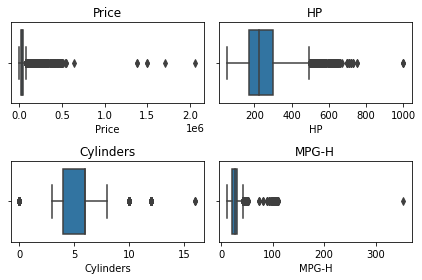

In [12]:
#Plotting graph 
f, axes = plt.subplots(2, 2)
sns.boxplot(x=df['Price'],ax=axes[0, 0]).set_title("Price")
sns.boxplot(x=df['HP'],ax=axes[0, 1]).set_title("HP")
sns.boxplot(x=df['Cylinders'],ax=axes[1, 0]).set_title("Cylinders")
sns.boxplot(x=df['MPG-H'],ax=axes[1, 1]).set_title("MPG-H")
plt.tight_layout()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Year              9.00
HP              130.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21231.25
dtype: float64


In [14]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(9084, 13)

# 5.Removing Data

Because of a huge data set as in this case,more than 10, 000 rows often have some duplicate data, so it is advised to remove all the duplicate value from the data-set.

# 5.1 Duplicate Rows

In [15]:
df.shape
print("number of rows: ", df.shape)
print("number of duplicate rows: ", df[df.duplicated()].shape)

number of rows:  (9084, 13)
number of duplicate rows:  (529, 13)


In [16]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Year,HP,Cylinders,Transmission,Drive Mode,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [17]:
df.shape

(8555, 13)

# 5.2 Missing/Null Values

We can either drop the missing values or fill them with the standard deviation or mean values which helps in fine tuning the model performance as more the data,the better the model performs

In [18]:
#checking for null values
print(df.isnull().sum())

Make              0
Model             0
Year              0
HP               11
Cylinders        19
Transmission      0
Drive Mode        0
Vehicle Size      0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


As the number is very less as compared to the total data set,we can drop these values.

In [19]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make             8525
Model            8525
Year             8525
HP               8525
Cylinders        8525
Transmission     8525
Drive Mode       8525
Vehicle Size     8525
Vehicle Style    8525
MPG-H            8525
MPG-C            8525
Popularity       8525
Price            8525
dtype: int64

In [20]:
#verifying
print(df.isnull().sum())

Make             0
Model            0
Year             0
HP               0
Cylinders        0
Transmission     0
Drive Mode       0
Vehicle Size     0
Vehicle Style    0
MPG-H            0
MPG-C            0
Popularity       0
Price            0
dtype: int64


# 6.Most Popular Car Brands

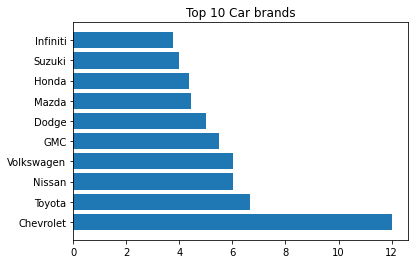

In [21]:
#percentage of car brands
percent = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# Top 10 car brands
popular = percent.index[:10]
    
# Plot
plt.barh(popular, width=percent[:10])
plt.title('Top 10 Car brands')
plt.show()

In [22]:
#average price of each brand
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28053.046829
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      27769.421793
Volkswagen  28855.654971


# 7.Correlation

In [23]:
#correlation between the features
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.324653,-0.108004,0.373982,0.336149,0.200423,0.595174
HP,0.324653,1.000000,0.733654,-0.453756,-0.554754,0.093257,0.743616
Cylinders,-0.108004,0.733654,1.000000,-0.692027,-0.746768,0.012329,0.385951
MPG-H,0.373982,-0.453756,-0.692027,1.000000,0.937104,0.093163,-0.118872
MPG-C,0.336149,-0.554754,-0.746768,0.937104,1.000000,0.081688,-0.195052
Popularity,0.200423,0.093257,0.012329,0.093163,0.081688,1.000000,0.112632
Price,0.595174,0.743616,0.385951,-0.118872,-0.195052,0.112632,1.000000


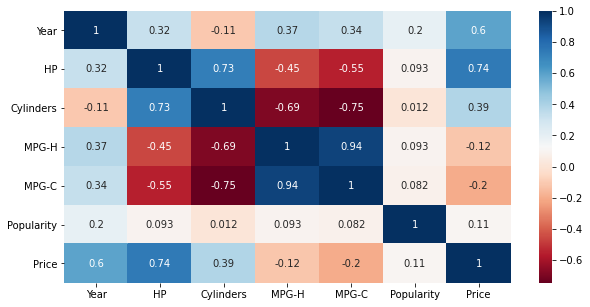

In [24]:
#Heatmap for easy visualization
plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="RdBu",annot=True)

**Findings:**

> **High correlation b/w:**
  *   Cylinders & HP  (more the cylinders more the horse power)
  *   highway mpg & City mpg  
  *   Hp & Price  (if horsepower is more the price will increase)

> **Anti correlation b/w:**
  *   Cylinders & highway mpg (more cylinder means more power hence more fuel  consumption which gives less average)
  *   Popularity and Cylinders (It seems more power attracts less buyers as they are costly)
  *   City mpg and Price (Less mileage means more power consumption hence the cost also increases)




# 8.Exploratory Data Analysis:

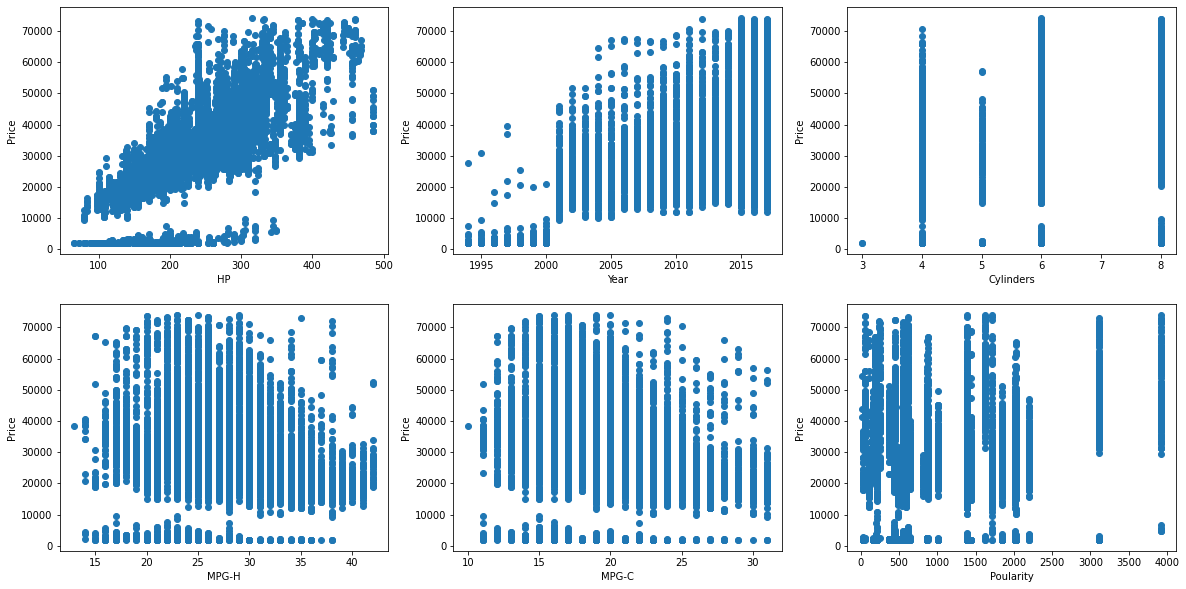

In [54]:
#Corelation of different features with price

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax[0][0].scatter(df['HP'], df['Price'])
ax[0][0].set_xlabel('HP')
ax[0][0].set_ylabel('Price')

ax[0][1].scatter(df['Year'], df['Price'])
ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Price')

ax[0][2].scatter(df['Cylinders'], df['Price'])
ax[0][2].set_xlabel('Cylinders')
ax[0][2].set_ylabel('Price')

ax[1][0].scatter(df['MPG-H'], df['Price'])
ax[1][0].set_xlabel('MPG-H')
ax[1][0].set_ylabel('Price')

ax[1][1].scatter(df['MPG-C'], df['Price'])
ax[1][1].set_xlabel('MPG-C')
ax[1][1].set_ylabel('Price')

ax[1][2].scatter(df['Popularity'], df['Price'])
ax[1][2].set_xlabel('Poularity')
ax[1][2].set_ylabel('Price')
plt.show()

In [25]:
#Vehicle style popularity

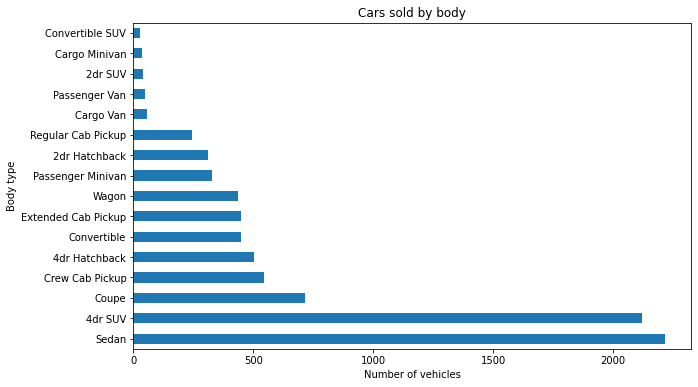

In [26]:

df['Vehicle Style'].value_counts().plot.barh(figsize=(10,6))                      # Bar chart for car 'body' variable
plt.title("Cars sold by body")
plt.xlabel('Number of vehicles')
plt.ylabel('Body type');

Conclusion:Sedan and 4dr SUV are the most preffered ones while Convertible SUVs and Cargo Vans are the least preffered

Text(0.5, 0, 'Count of vehicles')

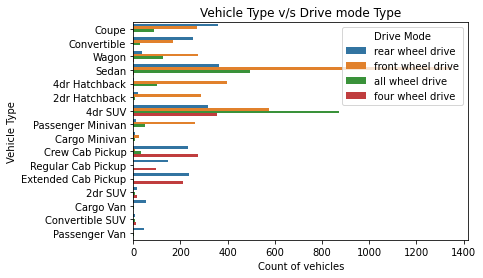

In [53]:
#Analysis of Vehicle Style and Drive type 
sns.countplot(y='Vehicle Style',data=df, hue='Drive Mode')
plt.title("Vehicle Type v/s Drive mode Type")
plt.ylabel('Vehicle Type')
plt.xlabel('Count of vehicles')


In [28]:
# Creating a new column 'Price_range' and assigning the value based on car price
df['price_range'] = pd.cut(df['Price'],[0,20000,40000,60000,80000,100000,600000], 
                                labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
df['price_range'] = df['price_range'].astype(object)

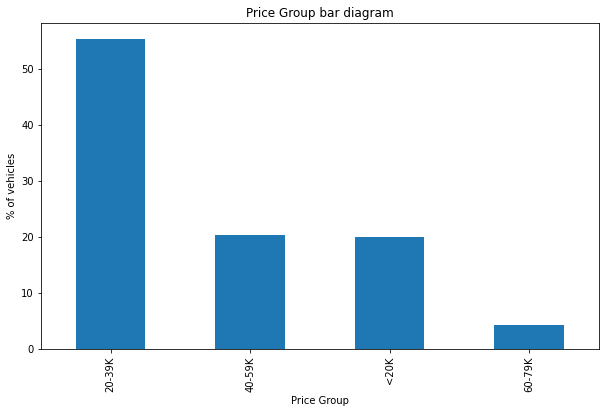

In [29]:
(df['price_range'].value_counts() / len(df) *100).plot.bar(figsize=(10,6))
plt.title("Price Group bar diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Price Group');

People tend to buy more cars in 20-39K price segment while very few has cars worth 60-79K

# 9.ML Model (Multilinear Regression)

In [30]:
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values
y = df['Price'].values

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [32]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [33]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

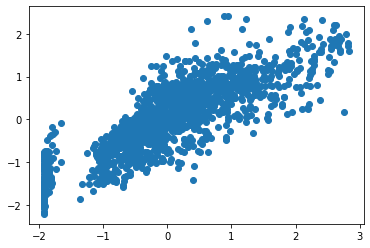

In [34]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

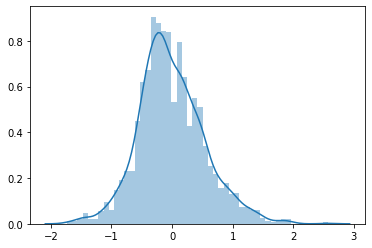

In [35]:
sns.distplot((y_test-y_pred),bins=50)

In [36]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.4242897880839016
Root Mean Squared Error: 0.5455714989279142
R2 Score: 0.6932761579473699


# 10.Some More Models

# 10.1 Polynomial Regression

In [37]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

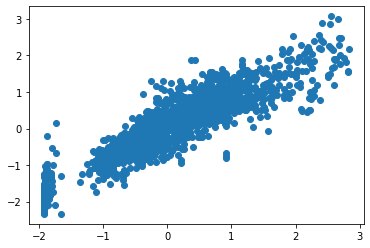

In [38]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

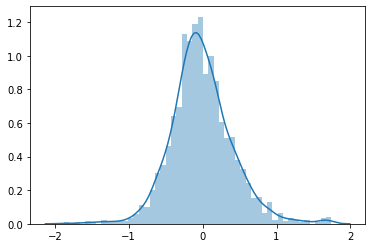

In [39]:
sns.distplot((y_test-y_pred),bins=50)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3144129554429672
Root Mean Squared Error: 0.41990021841253394
R2 Score: 0.8183077563350288


# 10.2 SVR

In [41]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

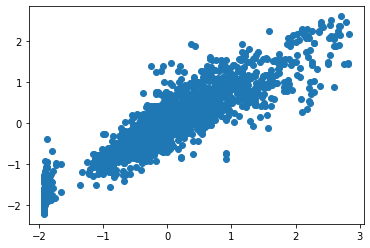

In [42]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

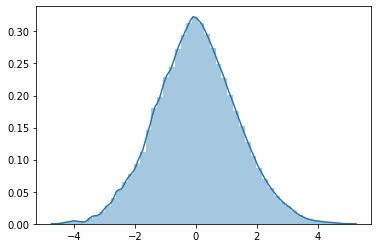

In [43]:
sns.distplot((y_test-y_pred),bins=50)

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.300047863994908
Root Mean Squared Error: 0.4138193025040644
R2 Score: 0.8235321170471953


# 10.3 Random Forest

In [45]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

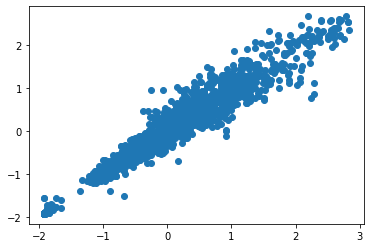

In [46]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

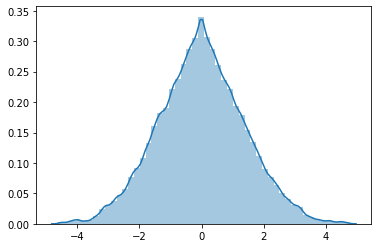

In [47]:
sns.distplot((y_test-y_pred),bins=50)


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))


Mean Absolute Error: 0.17871894244332184
Root Mean Squared Error: 0.24944126960434623
R2 Score: 0.9358818765275154
